In [10]:
%matplotlib inline

import matplotlib
import autograd.numpy as np
import matplotlib.pyplot as plt
import random
import math
from autograd import grad

def generateChevronData():
    xBounds = [-50, 50]
    yBounds = [-50, 50]
    totalPoints = 100
    
    points = []
    targets = []
    
    for i in range(0, totalPoints):
        x = random.randint(xBounds[0], xBounds[1])
        y = random.randint(yBounds[0], yBounds[1])
        
        if x >= y and x <= -y:
            points.append([x/50.0,y/50.0])
            targets.append(0)
        else:
            points.append([x/50.0,y/50.0])
            targets.append(1)
        
    return np.array(points), np.array(targets)
    
def plotScatter(points):
    xs = [x[0] for x in points]
    ys = [y[1] for y in points]
    
    plt.scatter(xs, ys)

In [11]:
def sigmoid(phi):
    return 1.0/(1.0 + np.exp(-phi))

def loss(weights):
    B = 1.35
    C = 2.65
    
    predictions = logisticPrediction(weights, points)
    
    r = responsibility(weights, points)
    
    pRight = np.power(predictions, targets) * np.power(1-predictions, 1-targets)
    pWrong = np.power(predictions, 1-targets) * np.power(1-predictions, targets)
    
    return np.sum(r * (B*pRight - C*pWrong))

def logisticPrediction(weights, p):
    return np.array(list(map(lambda x: predict(weights, x), p))) 
    
def predict(weights, inputs):
    n = np.array([weights[0], weights[1]])
    i = np.array([weights[2] - inputs[0], weights[3] - inputs[1]])
    return sigmoid(np.dot(n, i))

def responsibility(weights, points):
    r = np.absolute(weights[4])
    a = np.array([weights[2], weights[3]])
    
    dif = np.array(list(map(lambda x: x - a, points)))
    s = np.array(list(map(lambda x: np.sum(np.power(x, 2)), dif)))
    d = np.sqrt(s)

    t = 1 - f(d, r)
    return t

def f(d, r):
    t = np.zeros(len(d))
    for i in range(0, len(d)):
        if d[i] > r:
            t[i] = 1
            
    return t
#     return 1/(1 + np.power(np.e, -(d-r)))

In [12]:
def trainBoundaryHunter():
    weights = np.array([0.0, 0.0, 0.0, 0.0, 0.8])#-0.5 + np.random.rand(5)#
    weights[4] = np.absolute(weights[4])
    gradient = grad(loss)
    print("Initial Loss: ", loss(weights))
    for i in range(0, 7000):
        g = gradient(weights)
        
        if i % 1000 == 0:
            print("Loss [i = " + str(i) + "]: " + str(loss(weights)))
            print(weights)
            checkGrad(0.0001, 0.0001, weights, g)
        
        dr_dL = np.sign(loss(weights))
        if dr_dL == 0:
            dr_dL = 1
        g[4] = dr_dL
#         weights = computeStep(weights)
        weights += 0.001 * g
        if weights[4] < 0:
            weights[4] = 0
            
    print("Trained Loss: ", loss(weights))    
    print("Weights: ", weights)
    return weights

def checkGrad(pterb, threshold, weights, g):
    grad = np.zeros(len(weights))
    for i in range(0, len(weights)):
        p = np.zeros(len(weights))
        p[i] = pterb
        
        lossBefore = loss(weights)
        lossAfter = loss(weights + p)
        
        grad[i] = (lossAfter - lossBefore)/pterb
        

    return grad

    dif = np.absolute(computedGrad - grad)
    for d in dif:
        if d > threshold:
            print("ERROR")
    

Type 0:  35
Type 1:  65
Initial Loss:  -31.2
Loss [i = 0]: -31.2
[ 0.   0.   0.   0.   0.8]
Loss [i = 1000]: 0.0
[-0.16959601 -2.72627639 -0.01168439 -0.09586709  0.208     ]
Loss [i = 2000]: 0.0
[-0.1525312  -2.82788933 -0.01164377 -0.09529574  0.208     ]
Loss [i = 3000]: 0.0
[-0.1355305  -2.93005873 -0.01180986 -0.09900779  0.208     ]
Loss [i = 4000]: -0.24305086048
[-0.11868502 -3.03001722 -0.0116918  -0.09683684  0.21      ]
Loss [i = 5000]: 0.0
[-0.1017246  -3.13099189 -0.01164954 -0.09606999  0.208     ]
Loss [i = 6000]: -0.0352010126367
[-0.08511369 -3.2297805  -0.01160394 -0.0948267   0.208     ]
Trained Loss:  0.0
Weights:  [-0.06850912 -3.32889254 -0.01160926 -0.09535643  0.208     ]

[ 0.31822664  0.06850912  3.32889254]

Line
B: -0.0955953482825
XCoef: -0.020580154343


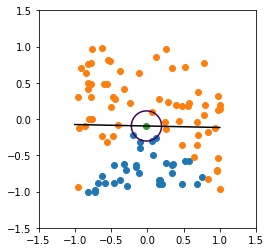

In [13]:
random.seed(1234)
points, targets = generateChevronData()

plt.axis([-1.5, 1.5, -1.5, 1.5])

# Plot points on graph
c1 = []
c2 = []

for i in range(0, len(points)):
    if targets[i] == 0:
        c1.append(points[i])
    else:
        c2.append(points[i])

print("Type 0: ", len(c1))
print("Type 1: ", len(c2))
        
plotScatter(c1)
plotScatter(c2)

random.seed(4332)
weights = trainBoundaryHunter()

# plt.scatter(weights[1], weights[2])
plt.scatter(weights[2], weights[3])

n = np.array([weights[0] * weights[2] + weights[1] * weights[3], 
              -weights[0], 
              -weights[1]])

byas = -1 * n[0]/n[2]
Xcoef = -1 * n[1]/n[2]

x = np.linspace(-1.5, 1.5, 500)
y = np.linspace(-1.5, 1.5, 500)
X, Y = np.meshgrid(x,y)
F = ((X - weights[2]))**2 + ((Y - weights[3]))**2 - weights[4]**2
plt.contour(X,Y,F,[0])

print()
print(n)
print("\nLine")
print("B: " + str(byas))
print("XCoef: " + str(Xcoef))

plt.plot([-1.0, 1.0], [-1*Xcoef + byas, Xcoef + byas], 'k-')
plt.gca().set_aspect('equal')

plt.show()